**Haqi Dhiya Firmana / 23051130016 / Teknologi Informasi - J**



---



In [1]:
import numpy as np
import sympy as sy
sy.init_printing()
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
def round_expr(expr, num_digits):
  return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sy.Number)})

# Visualization of Determinants

The physical interpretation of determinants is to compute the area enclosed by vectors. For instance,
consider the matrix

\begin{align}
A =
    \begin{bmatrix}
           a & b\\
           c & d\\
    \end{bmatrix}
 \end{align}

The determinant represents the area of the parallelogram formed by the vectors

\begin{align}
    \begin{bmatrix}
           a\\
           c\\
    \end{bmatrix}
    \text{ and }
    \begin{bmatrix}
           b\\
           d\\
    \end{bmatrix}
\end{align}

Here we demonstrate with a matrix

\begin{align}
    \begin{bmatrix}
           2 & 0\\
           0 & 3\\
    \end{bmatrix}
 \end{align}

It's also easy to understand the area formed by these two vectors are actually a rectangle.

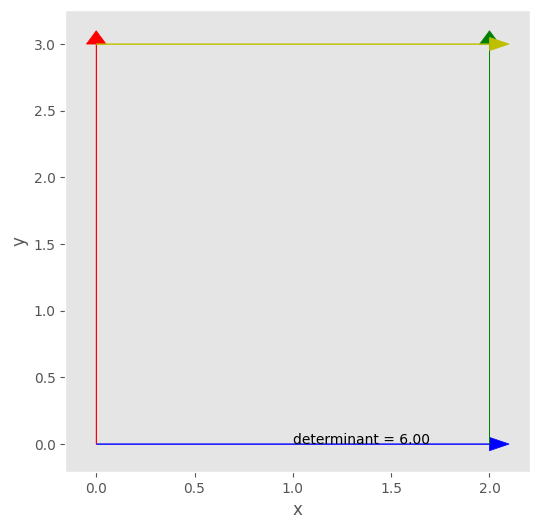

In [4]:
matrix = np.array([[2, 0], [0, 3]])
def plot_2ddet(matrix):
    # Calculate the determinant of the matrix
    det = np.linalg.det(matrix)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(6, 6))

    # Plot the vectors
    ax.arrow(0, 0, matrix[0,0], matrix[0,1], head_width=0.1, head_length=0.1, color='b')
    ax.arrow(0, 0, matrix[1,0], matrix[1,1], head_width=0.1, head_length=0.1, color='r')
    ax.arrow(matrix[0,0], matrix[0,1], matrix[1,0], matrix[1,1], head_width=0.1, head_length=0.1, color='g')
    ax.arrow(matrix[1,0], matrix[1,1], matrix[0,0], matrix[0,1], head_width=0.1, head_length=0.1, color='y')

    # Annotate the determinant value
    ax.annotate(f'determinant = {det:.2f}', (matrix[0,0]/2, matrix[0,1]/2))

    # Add labels and show the plot
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid()
    plt.show()

if __name__ == '__main__':
    plot_2ddet(matrix)

If the matrix is not diagonal, the area will take the form of a parallelogram. Similarly, in 3D space, the
determinant is the volume of a parallelepiped. First let's draw a parallelogram.

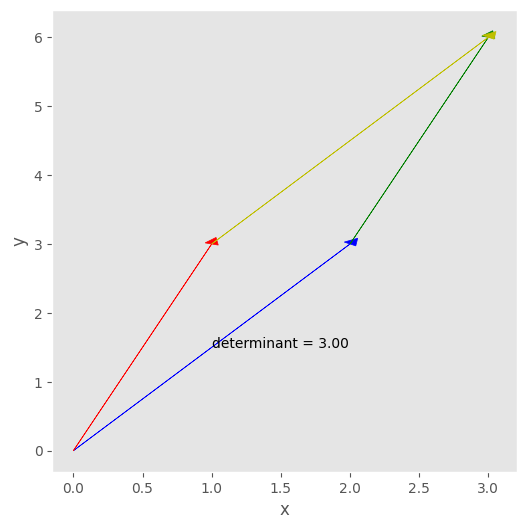

In [5]:
matrix = np.array([[2, 3], [1, 3]])
plot_2ddet(matrix)

However, determinant can be a negative number, it means we flip the area like flipping a piece of paper.

What if two vectors are linearly dependent? The area between vectors will be zero.

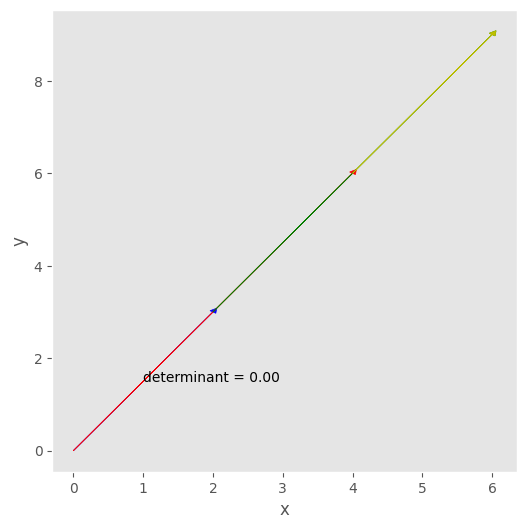

In [6]:
matrix = np.array([[2, 3], [4, 6]])
plot_2ddet(matrix)

This is the exact reason if we want a matrix to have full rank or linear independent columns, the determinant can't equal
to zero!This is the exact reason if we want a matrix to have full rank or linear independent columns, the determinant can't equal
to zero!

Here's a plot of parallelepiped, in case you are not sure how it looks.


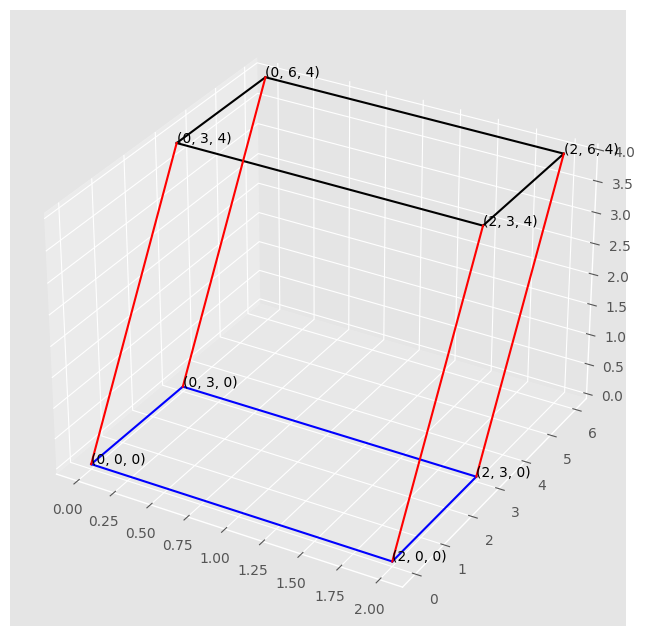

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the vertices of the parallelepiped
vertices = np.array([[2, 0, 0], [2, 3, 0], [0, 3, 0], [0, 0, 0],
[2, 3, 4], [2, 6, 4], [0, 6, 4], [0, 3, 4]])

# Plot edges between corresponding vertices
def plot_edges(vertices, pairs, color):
  for (i, j) in pairs:
    ax.plot([vertices[i, 0], vertices[j, 0]],
      [vertices[i, 1], vertices[j, 1]],
      [vertices[i, 2], vertices[j, 2]], color=color)

# Pairs of indices representing edges to be plotted
bottom_edges = [(i, (i+1)%4) for i in range(4)]
top_edges = [(i+4, (i+1)%4+4) for i in range(4)]
vertical_edges = [(i, i+4) for i in range(4)]

# Plot all edges
plot_edges(vertices, bottom_edges, 'blue')
plot_edges(vertices, top_edges, 'k')
plot_edges(vertices, vertical_edges, 'red')

# Add annotations for the coordinates at each vertex
for vertex in vertices:
  ax.text(vertex[0], vertex[1], vertex[2], f"({vertex[0]}, {vertex[1]}, {vertex[2]})")

plt.show()

## Computation of Determinants

For a 2 × 2 matrix \( A \), the determinant is calculated as:

\begin{align}
A =
    \begin{bmatrix}
           a & b\\
           c & d\\
    \end{bmatrix}
    \text{ is equivalent to }
    \text{ detA = ad = bc }
\end{align}

Now we experiment with SymPy

In [10]:
a, b, c, d, e, f, g, h, i = sy.symbols('a, b, c, d, e, f, g, h, i', real = True)

With defined symbols, the algorithms of 2 × 2 and 3 × 3 determinants are

In [9]:
A = sy.Matrix([[a, b], [c, d]])
A.det()

In [11]:
B = sy.Matrix([[a, b, c], [d, e, f], [g, h, i]])
B.det()

# Cofactor Expansion



The cofactor of $(i, j$)-cofactor of $(A$) is denoted as $(C_{ij}$) and is given by:

$$
C_{ij} = (-1)^{i+j} \cdot \det(M_{ij})
$$

where $(M_{ij}$) is the minor determinant obtained by excluding the $(i$)-th row and $(j$)-th column.

Let's learn from an example. Consider the matrix:

$$
A = \begin{bmatrix}
1 & 5 & 0 \\
2 & 4 & -2 \\
0 & -1 & 0
\end{bmatrix}
$$

Any determinant can be expanded along an arbitrary row or column. We will expand the determinant along the first row:

$$
\det(A) = 1 \cdot \det\begin{bmatrix} 4 & -2 \\ -1 & 0 \end{bmatrix} - 5 \cdot \det\begin{bmatrix} 2 & -2 \\ 0 & 0 \end{bmatrix} + 0 \cdot \det\begin{bmatrix} 2 & 4 \\ 0 & -1 \end{bmatrix}
$$


$$
= 1 \cdot (0 - (-2)) - 5 \cdot (0 - 0) + 0 \cdot (-4 - 0) \\
= 1 \cdot 2 - 5 \cdot 0 + 0 \cdot (-4)\\
= 2 - 0 + 0 = 2 \\
$$

The scalars 1, 5, 0 and in front of each minor determinant are the elements of the first row of $A$.
In general, the expansions across the $i$-th row or $j$-th column are:

$$
\det(A) = a_{i1}C_{i1} + a_{i2}C_{i2} + \cdots + a_{in}C_{in}
$$



$$
\det(A) = a_{1j}C_{1j} + a_{2j}C_{2j} + \cdots + a_{nj}C_{nj}
$$


# A SymPy Example of Determinant Expansion

Consider the matrix below and perform a cofactor expansion

In [12]:
A = sy.Matrix([[49, 0, 61], [73, 22, 96], [2, 0, 32]]); A

⎡49  0   61⎤
⎢          ⎥
⎢73  22  96⎥
⎢          ⎥
⎣2   0   32⎦

Cofactor expansion with the column which has two zero(s) involves the least computation burden:

$$
\det(A) = a_{12}(-1)^{1+2}C_{12} + a_{22}(-1)^{2+2}C_{22} + a_{32}(-1)^{3+2}C_{32}
$$


We can use SymPy function for calculationg minors:

`sy.matrices.matrices.MatrixDeterminant.minor(A, i, 1) `. Also we define a function for cofactor
expansion:

In [13]:
def cof_exp(matrix, c):
  """Calculate the cofactor expansion of a matrix along the c-th column."""
  detA = 0
  for i in range(matrix.shape[0]): # matrix.shape[0] is the total number of rows
    minor_matrix = matrix.minor_submatrix(i, c)
    cofactor = (-1)**(i + c) * minor_matrix.det()
    detA += matrix[i, c] * cofactor
  return detA

In [14]:
cof_exp(A,1)

It's easy to verify the expansion algorithm Sympy's determinant evaluation function.

In [15]:
A.det()

Actually you can experiment with any random matrices with multiple zeros, the function below has the
parameter percent=70 which means 70% of element are non-zero.

In [16]:
B = sy.randMatrix(r = 7, min=10, max=50, percent=70);B

⎡0   38  44  20  0   0   0 ⎤
⎢                          ⎥
⎢0   0   0   49  18  0   44⎥
⎢                          ⎥
⎢25  23  20  29  42  28  31⎥
⎢                          ⎥
⎢36  28  36  15  15  0   25⎥
⎢                          ⎥
⎢0   0   17  38  40  25  0 ⎥
⎢                          ⎥
⎢28  16  19  31  44  0   26⎥
⎢                          ⎥
⎣28  0   27  0   10  44  22⎦

Calculate determinants with our user-defined function

In [17]:
cof_exp(B, 1)

Then verify the result of using determinant method .det() . We can see indeed cofactor expansion
works!

In [18]:
B.det()

Minor matrices can also be extracted by using the code `.minor_submatrix()`. For instance, the matrix of $( M_{23} $) matrix $B$ is:


In [19]:
B.minor_submatrix(1, 2)

⎡0   38  20  0   0   0 ⎤
⎢                      ⎥
⎢25  23  29  42  28  31⎥
⎢                      ⎥
⎢36  28  15  15  0   25⎥
⎢                      ⎥
⎢0   0   38  40  25  0 ⎥
⎢                      ⎥
⎢28  16  31  44  0   26⎥
⎢                      ⎥
⎣28  0   0   10  44  22⎦

*Cofactor matrix is the matrix contains all cofactors of original matrix, and function .cofactor_matrix()
can easily produce this type of matrix.*

The matrix \( A \) is given by:

$$
A = \begin{bmatrix}
C_{11} & C_{12} & C_{13} \\
C_{21} & C_{22} & C_{23} \\
C_{31} & C_{32} & C_{33}
\end{bmatrix}
= \begin{bmatrix}
(-1)^{1+1} M_{11} & (-1)^{2+1} M_{21} & (-1)^{3+1} M_{31} \\
(-1)^{1+2} M_{12} & (-1)^{2+2} M_{22} & (-1)^{3+2} M_{32} \\
(-1)^{1+3} M_{13} & (-1)^{2+3} M_{23} & (-1)^{3+3} M_{33}
\end{bmatrix}
$$


In [20]:
A.cofactor_matrix()

⎡ 704   -2144  -44 ⎤
⎢                  ⎥
⎢  0    1446    0  ⎥
⎢                  ⎥
⎣-1342  -251   1078⎦

# Triangular Matrix

If $A$ is triangular matrix, cofactor expansion can be applied repetitively, the outcome will be a product of the elements on the principal diagonal.

$$\text{det } A_{n \times n} = \prod_{i=1}^n a_{ii}$$

where $a_{ii}$ is the diagonal element.

Here is the proof, start with $A$
$$
A =
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{bmatrix}
$$

Cofactor expanding on the first column, the sign of $a_{ii}$ is always positive because $(-1)^{2i}$ :

$$
a_{11} \cdot
\begin{bmatrix}
a_{22} & a_{23} & \cdots & a_{2n} \\
a_{32} & a_{33} & \cdots & a_{3n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n2} & a_{n3} & \cdots & a_{nn}
\end{bmatrix}
$$

Continue the cofactor expansion:

$$
\text{det } A = a_{11} a_{22} \cdot
\begin{bmatrix}
a_{33} & a_{34} & \cdots & a_{3n} \\
a_{44} & a_{45} & \cdots & a_{4n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n3} & a_{n4} & \cdots & a_{nn}
\end{bmatrix}
$$

Iterating the expansion, eventually:

$$
\text{det } A = a_{11} \cdot a_{22} \cdot \cdots \cdot a_{n-1,n-1} \cdot
\begin{bmatrix}
a_{n-1,n-1} & a_{n-1,n} \\
a_{nn}
\end{bmatrix}
= a_{11} \cdot a_{22} \cdot \cdots \cdot a_{nn}
$$

Now let's verify with a numeric example, generate a random upper triangular matrix.


In [26]:
A = np.round(np.random.rand(5,5)*100)
A_triu = np.triu(A); A_triu

array([[ 6., 93., 57., 73., 26.],
       [ 0.,  6., 72., 34.,  7.],
       [ 0.,  0., 37., 53., 14.],
       [ 0.,  0.,  0., 64., 98.],
       [ 0.,  0.,  0.,  0., 11.]])

Compute the determinant with `np.linalg.det`

In [27]:
np.linalg.det(A_triu)

Extract the diagonal with `.np.diag()` , then calculate the product. We should expect the same results.

In [28]:
A_diag = np.diag(A_triu)
np.prod(A_diag)

# Properties of Determinants

Determinants have a long list of properties, but they are mostly derived from cofactor expansion. There is no need to memorize them.

1. Let $A$ be an $n \times n$ square matrix. If one row of $A$ is multiplied by $k$ to produce the matrix $B$, then $\text{det} B = k \cdot \text{det} A$.
2. Let $A$ be an $n \times n$ square matrix. If two rows of $A$ are interchanged to produce a matrix $B$, then $\text{det} B = -\text{det} A$.
3. Let $A$ be an $n \times n$ square matrix. If a multiple of one row of $A$ is added to another row to produce the matrix $B$, then $\text{det} A = \text{det} B$.
4. If $A$ is an $n \times n$ matrix, then $\text{det} A^T = \text{det} A$.
5. A square matrix $A$ is invertible if and only if $\text{det} A \neq 0$.
6. If $A$ and $B$ are $n \times n$ matrices, then $\text{det}(AB) = (\text{det} A)(\text{det} B)$.
7. If $A$ is an $n \times n$ matrix and $k$ is a scalar, then $\text{det}(kA) = k^n \cdot \text{det} A$.
8. If $A$ is an invertible square matrix, then $\text{det}(A^{-1}) = \frac{1}{\text{det} A}$.











All of these properties are straightforward. The key is to demonstrate them using cofactor expansion.

Here are some casual proofs.

Proof of property 6:

$$
|AB| = |E_p \cdots E_1 B| = |E_p| |E_{p-1} \cdots E_1 B| = \cdots \\
= |E_p| \cdots |E_1| |B| = \cdots = |E_p \cdots E_1| |B| \\
= |A| |B|
$$

Proof of property 7:

Because $\text{det} B = k \cdot \text{det} A$, one row of $A$ is multiplied by $k$ to produce $B$. Then multiply all the rows of $A$ by $k$, there will be $n$ $k$'s in front of $\text{det} A$, which is $k^n \cdot \text{det} A$.

Proof of property 8:

$$
AA^{-1} = I
$$

$$
|AA^{-1}| = |I|
$$

$$
|A^{-1}| = \frac{1}{|A|}
$$

$$
|A^{-1}A| = 1
$$

These properties are useful in the analytical derivation of other theorems; however, they are not efficient
for numerical computation.

# Cramer's Rule

If a linear system has equations and variables, an algorithm called Cramer's Rule can solve the
system in terms of determinants as long as the solution is unique.

$$A_{nxn}b_n = X_n$$

Some convenient notations are introduced here:

For any $A_{n×n}$ and vector **$b$**, denote $A_i$(**$b$**) as the matrix obtained from replacing the $i$-th column of $A$ by **$b$**

$$
A_i(b) = \begin{bmatrix} a_1 & \cdots & b & \cdots & a_n \end{bmatrix}
$$


The Cramer's Rule can solve each $x_i$ without solving the whole system


$$
x_i = \frac{\text{det} A_i(\mathbf{b})}{\text{det} A}, \quad i = 1, 2, \dots, n
$$


**Fast Proof of Cramer's Rule:**

$$
A \cdot I_i(\mathbf{x}) = A
\begin{bmatrix}
\mathbf{e}_1 & \cdots & \mathbf{x} & \cdots & \mathbf{e}_n
\end{bmatrix}
=
\begin{bmatrix}
A\mathbf{e}_1 & \cdots & A\mathbf{x} & \cdots & A\mathbf{e}_n
\end{bmatrix}
$$

$$
= \begin{bmatrix} \mathbf{a}_1 & \cdots & \mathbf{b} & \cdots & \mathbf{a}_n \end{bmatrix} = A_i(\mathbf{b})
$$

where $I_i(\mathbf{x})$ is an identity matrix whose $i$-th column is replaced by $\mathbf{x}$. With the determinant's property,

$$
(\text{det} A)(\text{det} I_i(\mathbf{x})) = \text{det} A_i(\mathbf{b})
$$

$
\text{det} I_i(\mathbf{x}) = x_i
$
can be shown by cofactor expansion.


# A NumPy Example On Cramer's Rule

Consider the system

$$
2x - y + 3z = -3\\
3x + 3y - z = 10\\
- x - y + z = -4\\
$$

You have surely known several ways to solve it, but let's test if Cramer's rule works.
Input the matrices into NumPy arrays.

In [29]:
A = np.array([[2, -1, 3], [3, 3, -1], [-1, -1, 1]])
b = np.array([-3, 10, -4])

In [30]:
A_1b = np.copy(A) # Python variable is a reference tag
A_1b[:,0]=b
A_2b = np.copy(A)
A_2b[:,1]=b
A_3b = np.copy(A)
A_3b[:,2]=b

According to Cramer's rule:

In [31]:
x1 = np.linalg.det(A_1b)/np.linalg.det(A)
x2 = np.linalg.det(A_2b)/np.linalg.det(A)
x3 = np.linalg.det(A_3b)/np.linalg.det(A)
(x1, x2, x3)

We can verify the results by NumPy built-in function np.linalg.solve .

In [32]:
np.linalg.solve(A, b)

array([ 1.,  2., -1.])

Or in a straightforward way $A^{-1}$ $b$

In [33]:
np.linalg.inv(A)@b

array([ 1.,  2., -1.])

All results are the same!

However, remember that Cramer's rule is rarely used in practice for solving systems of equations, as its
computational cost (measured by the number of floating-point operations, or flops) is much higher than
that of Gaussian-Jordan elimination.

# A Determinant Formula For Inverse Matrix



An alternative algorithm for $A^{-1}$ is

$$
A^{-1} = \frac{1}{\text{det} A} \begin{bmatrix}
C_{11} & C_{12} & \cdots & C_{1n} \\
C_{21} & C_{22} & \cdots & C_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
C_{n1} & C_{n2} & \cdots & C_{nn}
\end{bmatrix}
$$

where the matrix of cofactors on the RHS is the adjugate matrix. SymPy function is `sy.matrices.matrices.MatrixDeterminant.adjugate`. And this is the transpose of the cofactor matrix which we computed using `sy.matrices.matrices.MatrixDeterminant.cofactor_matrix`.


# A SymPy Example

Generate a random matrix with 20% of zero elements.

In [35]:
A = sy.randMatrix(5, min=-5, max = 5, percent = 80); A

⎡0   0   0   5   1 ⎤
⎢                  ⎥
⎢1   0   -2  -1  -5⎥
⎢                  ⎥
⎢5   0   5   2   -5⎥
⎢                  ⎥
⎢-2  0   1   -4  3 ⎥
⎢                  ⎥
⎣0   -5  -1  2   0 ⎦

Compute the adjugate matrix

In [36]:
A_adjugate = A.adjugate(); A_adjugate

⎡790   610    70   870    0 ⎤
⎢                           ⎥
⎢-19    11    23    63   156⎥
⎢                           ⎥
⎢-355  -205  -145  -465   0 ⎥
⎢                           ⎥
⎢-225  -75   -15   -75    0 ⎥
⎢                           ⎥
⎣345   375    75   375    0 ⎦

We can verify if this really the adjugate of $A$, we pick element of $(1,3),(2,4),(5,4)$ of $A$ to compute the
cofactors

In [37]:
display(f"(2, 0) minor: {(-1)**(1+3) * A.minor(2, 0)}") # (1, 3) cofactor of A, transpose
display(f"(3, 1) minor: {(-1)**(2+4) * A.minor(3, 1)}")
display(f"(3, 4) minor: {(-1)**(5+4) * A.minor(3, 4)}")

'(2, 0) minor: 70'

'(3, 1) minor: 63'

'(3, 4) minor: 375'

Adjugate is the transpose of cofactor matrix, thus we reverse the row and column index when referring to
the elements. As we have shown it is truel adjugate matrix.

Next we will check if this inverse formula works with SymPy's function.


The `sy.N()` is for converting to float approximation, i.e. if you don't like fractions.


In [38]:
A_det = A.det()
A_inv = (1/A_det)*A_adjugate
round_expr(sy.N(A_inv), 4)

⎡-1.0128  -0.7821  -0.0897  -1.1154   0  ⎤
⎢                                        ⎥
⎢0.0244   -0.0141  -0.0295  -0.0808  -0.2⎥
⎢                                        ⎥
⎢0.4551   0.2628   0.1859   0.5962    0  ⎥
⎢                                        ⎥
⎢0.2885   0.0962   0.0192   0.0962    0  ⎥
⎢                                        ⎥
⎣-0.4423  -0.4808  -0.0962  -0.4808   0  ⎦

Now again, we can verify the results with `.inv()`

In [39]:
round_expr(sy.N(A.inv()), 4)

⎡-1.0128  -0.7821  -0.0897  -1.1154   0  ⎤
⎢                                        ⎥
⎢0.0244   -0.0141  -0.0295  -0.0808  -0.2⎥
⎢                                        ⎥
⎢0.4551   0.2628   0.1859   0.5962    0  ⎥
⎢                                        ⎥
⎢0.2885   0.0962   0.0192   0.0962    0  ⎥
⎢                                        ⎥
⎣-0.4423  -0.4808  -0.0962  -0.4808   0  ⎦